In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a dummy attribute names
from faker import Faker
fake = Faker()
Faker.seed(4321)
names_list = []
for _ in range(100):
    names_list.append(fake.name())
len(names_list)    

100

In [4]:
# Create a dummy attribute salaries
np.random.seed(7)
salary = []
for _ in range(100):
    salary.append(np.random.randint(1000, 2500))
len(salary)

100

In [5]:
salary_df =pd.DataFrame({'Person':names_list, 'Salary':salary})
salary_df.head()

,Person,Salary
0,Jason Brown,1175
1,Jacob Stein,2220
2,Cody Brown,1537
3,Larry Morales,1502
4,Jessica Hendricks,1211


In [6]:
salary_df.at[16, 'Salary'] = 15
salary_df.at[65, 'Salary'] = 23 

In [7]:
# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person    Miss Amanda Harris MD
Salary                       15
Name: 16, dtype: object
Person    Joyce Bishop
Salary              23
Name: 65, dtype: object


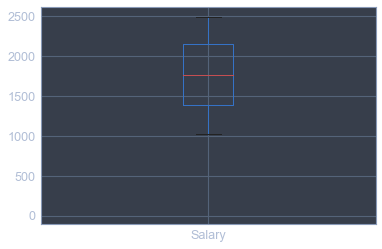

In [8]:
salary_df["Salary"].plot(kind="box")
plt.show()

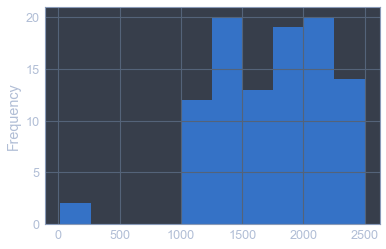

In [9]:
salary_df["Salary"].plot(kind="hist")
plt.show()

In [10]:
print("Minimum Salary is: ", str(salary_df["Salary"].min()))
print("Maximum Salary is: ", str(salary_df["Salary"].max()))

('Minimum Salary is: ', '15')
('Maximum Salary is: ', '2498')


In [11]:
salary_raw = salary_df['Salary'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [12]:
from scipy.cluster.vq import kmeans
centroids, avg_distance = kmeans(salary_raw, 2)

In [13]:
from scipy import cluster
groups, cdist = cluster.vq.vq(salary_raw, centroids)

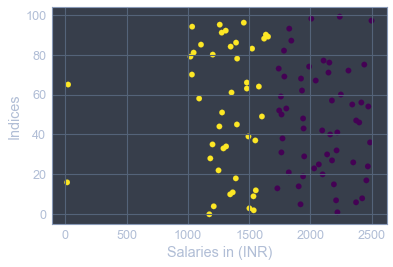

In [14]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (INR)')
plt.ylabel('Indices')
plt.show()

In [15]:
salary_df["class"] = 0
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

In [16]:
salary_df.corr()

,Salary,class
Salary,1.000000,-0.504088
class,-0.504088,1.000000


In [17]:
salary_df.head()

,Person,Salary,class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0


In [18]:
print(salary_df.loc[16])

Person    Miss Amanda Harris MD
Salary                       15
class                         1
Name: 16, dtype: object


In [21]:
from sklearn.neighbors import KNeighborsClassifier 
# Segregate the salary values and the class labels 
X = salary_df['Salary'].values.reshape(-1,1)
y = salary_df['class'].values
knn = KNeighborsClassifier(n_neighbors=2)
# Train kNN detector
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
X_test = np.array([[37.]])
knn.predict(X_test)

array([1])